In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [27]:
#Assigning the dataframe url to a variable.
url_df = "https://github.com/Jefexon/Alura-Data-Immersion-3/blob/main/Data/data_experiments.zip?raw=true"

#Assigning the uncompressed csv dataframe to a variable.
df = pd.read_csv(url_df, compression = 'zip')

In [2]:
df.head()

,id,treatment,duration,dose,composite,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,with_drug,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,with_drug,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,with_drug,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,with_drug,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,with_drug,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Note:
##### pandas.crosstab

In [3]:
pd.crosstab(df['dose'], df['duration'])

duration,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [5]:
pd.crosstab([df['dose'], df['duration']], df['treatment'])

treatment      with_control  with_drug
dose duration                         
D1   24                 301       3585
     48                 343       4011
     72                 307       3600
D2   24                 305       3581
     48                 305       3591
     72                 305       3580

In [7]:
pd.crosstab([df['dose'], df['duration']], df['treatment'], normalize='index')

treatment      with_control  with_drug
dose duration                         
D1   24            0.077458   0.922542
     48            0.078778   0.921222
     72            0.078577   0.921423
D2   24            0.078487   0.921513
     48            0.078285   0.921715
     72            0.078507   0.921493

In [9]:
pd.crosstab([df['dose'], df['duration']], df['treatment'], values=df['g0'], aggfunc='mean')

treatment      with_control  with_drug
dose duration                         
D1   24           -0.251760   0.367996
     48           -0.122773   0.412469
     72           -0.295271   0.286250
D2   24            0.010754   0.115253
     48            0.013174   0.214480
     72            0.070250   0.253439

In [12]:
df[['g0', 'g3']]

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


<AxesSubplot:xlabel='g0', ylabel='g3'>

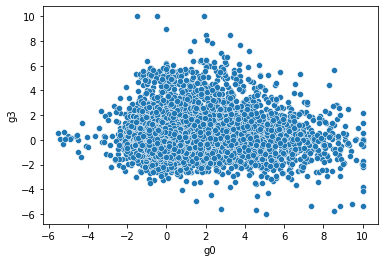

In [13]:
sns.scatterplot(x='g0', y= 'g3', data=df)

<AxesSubplot:xlabel='g0', ylabel='g8'>

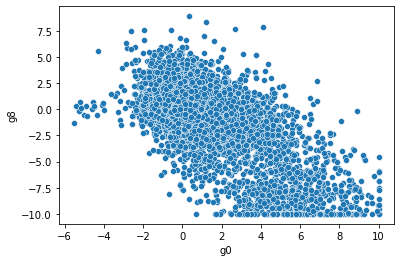

In [14]:
sns.scatterplot(x='g0', y= 'g8', data=df)

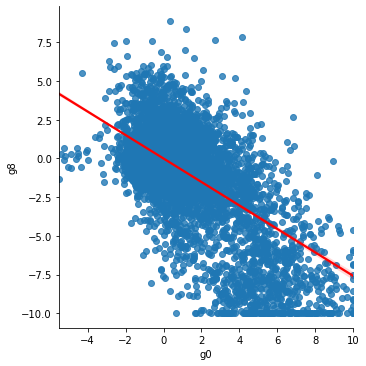

In [16]:
sns.lmplot(data=df, x='g0', y= 'g8', line_kws={'color':'red'} )

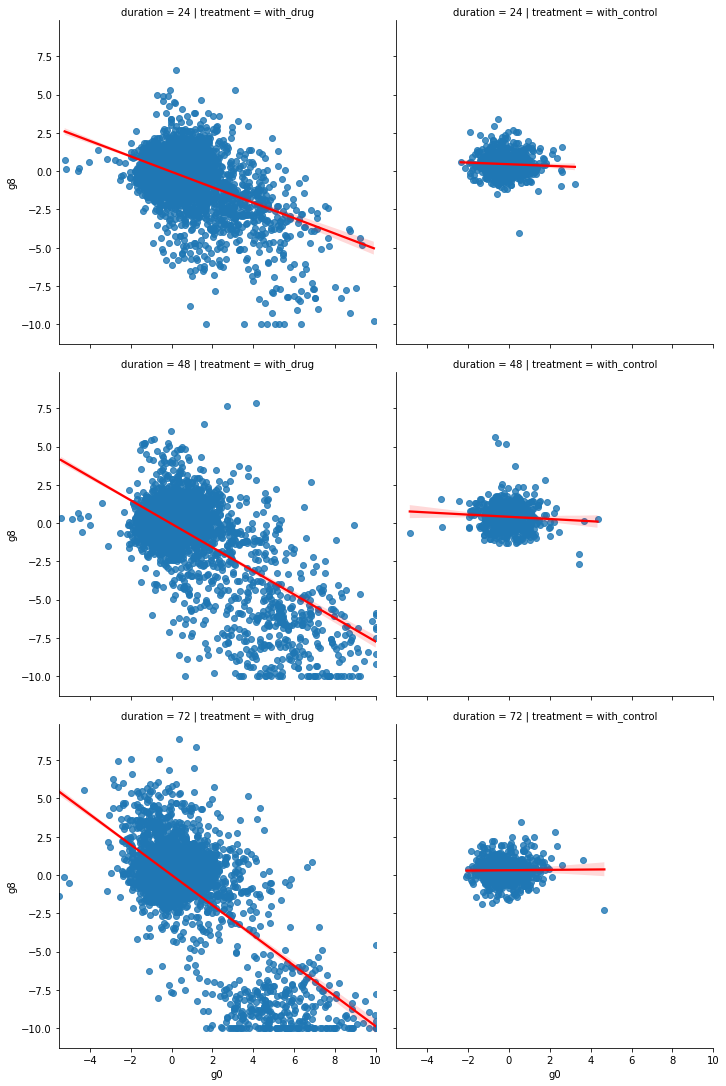

In [18]:
sns.lmplot(data=df, x='g0', y= 'g8', line_kws={'color':'red'}, col='treatment', row='duration' )

### Note:
#### correlation
When the result is close to **-1** or **+1**, it means the variables have a **strong relationship**. When they are close to **0**, it means they have a **weak relationship**.

In [19]:
df.loc[:, 'g0':'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


## Plotting a diagonal correlation matrix

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [31]:
# Compute the correlation matrix
corr = df.loc[:, 'g0':'g50'].corr()

<AxesSubplot:>

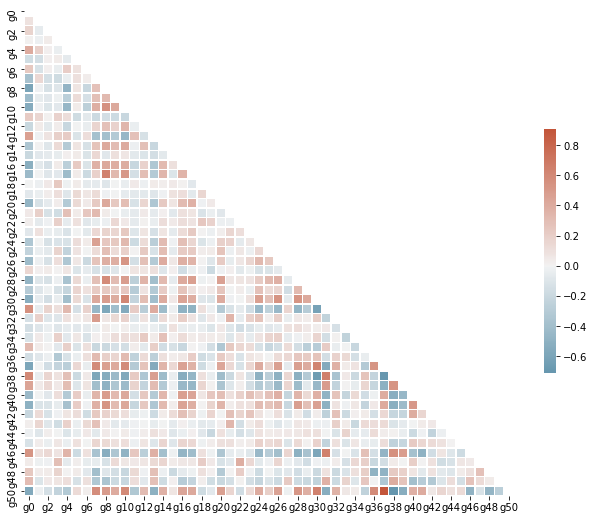

In [32]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Note:

##### The values in the *c#* columns is the viability of the cell (how many cells alive).

In [36]:
# Compute the correlation matrix
corr_cel = df.loc[:, 'c0':'c50'].corr()

<AxesSubplot:>

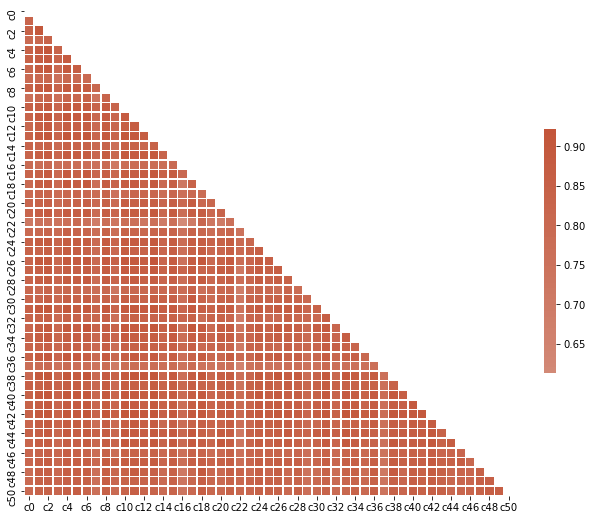

In [38]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cel, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cel, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Challenge 1: Do as in *pd.crosstab([df['dose'], df['duration']], df['treatment'], normalize='index')* but, using *"pandas.groupby()"*. (frequency table).

### Challenge 2: Normalize columns using crosstab, so the sum of the values in each columns is 1.

### Challenge 3: Explore other options for *aggfunc=*

### Challenge 4:  Explore *melt*

### Challenge 5: Calculate and analyze the correlation between *g#*s and *c#*s.

### Challenge 6: Study *Plotting a diagonal correlation matrix*

### Challenge 7: Summary